In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('ufc-master.csv')

# Date formatting
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

# Rename columns to all lowercase
cols_new = {}
for c in list(df.columns):
    cols_new[c] = c.lower()
df.rename(columns = cols_new, inplace=True)

# Replace pandas NaN with None
df = df.where(pd.notnull(df), None)

# Binary Encoding of Response: Winner (1: Red, 0: Blue)
def winner(df):
    df_copy = df.copy()
    def calc_value(row):
        if row['winner'] == 'Red':
            return 1
        else:
            return 0
    df_copy['winner'] = df_copy.apply(calc_value, axis=1) #axis=1 returns each row of df as a Series object
    return df_copy
df = winner(df)

# Binary Encoding of Gender: (1: Male, 0: Female)
def gender(df):
    df_copy = df.copy()
    def calc_value(row):
        if row['gender'] == 'MALE':
            return 1
        else:
            return 0
    df_copy['gender'] = df_copy.apply(calc_value, axis=1) #axis=1 returns each row of df as a Series object
    return df_copy
df = gender(df)

# Binary Encoding of Title_Bout: (1: True, 0: False)
def title(df):
    df_copy = df.copy()
    def calc_value(row):
        if row['title_bout'] == True:
            return 1
        else:
            return 0
    df_copy['title_bout'] = df_copy.apply(calc_value, axis=1) #axis=1 returns each row of df as a Series object
    return df_copy
df = title(df)

# Strip Text
df['b_stance'] = df['b_stance'].str.strip()
df['r_stance'] = df['r_stance'].str.strip()
df['b_fighter'] = df['b_fighter'].str.strip()
df['r_fighter'] = df['r_fighter'].str.strip()

/Users/usmanmahmood/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (79,80) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
#fighter = {'SeungWoo Choi','Seungwoo Choi'}
#df[df['r_fighter'].isin(fighter)|df['b_fighter'].isin(fighter)]

In [5]:
# Correct Name misspellings
df.loc[307,'b_fighter'] = 'Zhalgas Zhumagulov'
df.loc[718,'r_fighter'] = 'Alexander Volkov'
df.loc[251,'b_fighter'] = 'Ali AlQaisi'
df.loc[686,'b_fighter'] = "Don'Tale Mayes"
df.loc[493,'r_fighter'] = 'Germaine de Randamie'
df.loc[442,'r_fighter'] = 'Kai Kara-France'
df.loc[764,'b_fighter'] = 'Kai Kara-France'
df.loc[521,'b_fighter'] = 'Krzysztof Jotko'
df.loc[436,'b_fighter'] = 'Marcos Rogerio de Lima'
df.loc[758,'r_fighter'] = 'Petr Yan'
df.loc[7, 'r_fighter'] = 'Seungwoo Choi'
df.loc[551,'b_fighter'] = 'Youssef Zalal'

In [6]:
df.head()

,r_fighter,b_fighter,r_odds,b_odds,r_ev,b_ev,date,location,country,winner,title_bout,weight_class,gender,no_of_rounds,b_current_lose_streak,b_current_win_streak,b_draw,b_avg_sig_str_landed,b_avg_sig_str_pct,b_avg_sub_att,b_avg_td_landed,b_avg_td_pct,b_longest_win_streak,b_losses,b_total_rounds_fought,b_total_title_bouts,b_win_by_decision_majority,b_win_by_decision_split,b_win_by_decision_unanimous,b_win_by_ko/tko,b_win_by_submission,b_win_by_tko_doctor_stoppage,b_wins,b_stance,b_height_cms,b_reach_cms,b_weight_lbs,r_current_lose_streak,r_current_win_streak,r_draw,r_avg_sig_str_landed,r_avg_sig_str_pct,r_avg_sub_att,r_avg_td_landed,r_avg_td_pct,r_longest_win_streak,r_losses,r_total_rounds_fought,r_total_title_bouts,r_win_by_decision_majority,...,r_middleweight_rank,r_welterweight_rank,r_lightweight_rank,r_featherweight_rank,r_bantamweight_rank,r_flyweight_rank,r_pound-for-pound_rank,b_women's flyweight_rank,b_women's featherweight_rank,b_women's strawweight_rank,b_women's bantamweight_rank,b_heavyweight_rank,b_light heavyweight_rank,b_middleweight_rank,b_welterweight_rank,b_lightweight_rank,b_featherweight_rank,b_bantamweight_rank,b_flyweight_rank,b_pound-for-pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_kd_bout,b_kd_bout,r_sig_str_landed_bout,b_sig_str_landed_bout,r_sig_str_attempted_bout,b_sig_str_attempted_bout,r_sig_str_pct_bout,b_sig_str_pct_bout,r_tot_str_landed_bout,b_tot_str_landed_bout,r_tot_str_attempted_bout,b_tot_str_attempted_bout,r_td_landed_bout,b_td_landed_bout,r_td_attempted_bout,b_td_attempted_bout,r_td_pct_bout,b_td_pct_bout,r_sub_attempts_bout,b_sub_attempts_bout,r_pass_bout,b_pass_bout,r_rev_bout,b_rev_bout
0,Alistair Overeem,Alexander Volkov,150,-182,150.0,54.945055,2021-02-06,"Las Vegas, Nevada, USA",USA,0,0,Heavyweight,1,5,0,1,0,4.76,0.58,0.2,0.69,0.7,4,2,26,0,0,1,2,3,0,0,6,Orthodox,200.66,203.2,250,0,2,0,3.71,0.64,0.8,1.44,0.56,11,15,83,1,1,...,None,None,None,None,None,None,None,None,None,None,None,6.0,None,None,None,None,None,None,None,None,Red,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Cory Sandhagen,Frankie Edgar,-400,300,25.0,300.0,2021-02-06,"Las Vegas, Nevada, USA",USA,1,0,Bantamweight,1,3,0,1,1,3.7,0.39,0.3,2.28,0.31,5,8,94,9,0,1,10,5,2,0,18,Orthodox,167.64,172.72,135,0,1,0,6.88,0.48,0.5,1.07,0.5,5,1,14,0,0,...,None,None,None,None,2.0,None,None,None,None,None,None,None,None,None,None,None,None,4.0,None,None,Red,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,Alexandre Pantoja,Manel Kape,-125,100,80.0,100.0,2021-02-06,"Las Vegas, Nevada, USA",USA,1,0,Flyweight,1,3,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,Southpaw,165.1,172.72,125,1,0,0,4.2,0.47,1.1,1.08,0.36,3,3,21,0,0,...,None,None,None,None,None,5.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Red,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Diego Ferreira,Beneil Dariush,-125,105,80.0,105.0,2021-02-06,"Las Vegas, Nevada, USA",USA,0,0,Lightweight,1,3,0,5,1,3.98,0.49,1.1,1.75,0.32,5,4,36,0,0,1,4,3,5,0,13,Southpaw,177.8,182.88,155,0,6,0,5.07,0.36,1.0,1.04,0.27,6,2,21,0,0,...,None,None,10.0,None,None,None,None,None,None,None,None,None,None,None,None,13.0,None,None,None,None,Red,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Michael Johnson,Clay Guida,-225,175,44.444444,175.0,2021-02-06,"Las Vegas, Nevada, USA",USA,0,0,Lightweight,1,3,2,0,0,2.41,0.33,0.7,3.37,0.38,4,15,87,0,0,3,8,2,4,0,17,Orthodox,170.18,177.8,155,3,0,0,4.23,0.38,0.1,0.51,0.45,4,12,58,0,0,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,neither,Non

In [7]:
# Columns (79,80) have mixed types.
df.columns[79:81]

Index(['b_match_weightclass_rank', 'r_match_weightclass_rank'], dtype='object')

In [8]:
# Clean up Rank columns:
def clean_rank(df, col):
    
    df_new = df.copy()
    
    def parse(text):
        re_txt = re.compile(r'\d+')
        
        if text is None:
            return None
        else:
            match = re_txt.match(text)
            if match:
                return int(match.group(0))
            else:
                return None
    
    df_new[col] = df_new[col].map(parse)
    
    return df_new

df = clean_rank(df, 'r_match_weightclass_rank')
df = clean_rank(df, 'b_match_weightclass_rank')

In [9]:
# Exclude features/columns because of irrelevance and high null counts
excl_cols = [
 'location',
 'country',
 'empty_arena',
 "r_women's flyweight_rank",
 "r_women's featherweight_rank",
 "r_women's strawweight_rank",
 "r_women's bantamweight_rank",
 'r_heavyweight_rank',
 'r_light heavyweight_rank',
 'r_middleweight_rank',
 'r_welterweight_rank',
 'r_lightweight_rank',
 'r_featherweight_rank',
 'r_bantamweight_rank',
 'r_flyweight_rank',
 'r_pound-for-pound_rank',
 "b_women's flyweight_rank",
 "b_women's featherweight_rank",
 "b_women's strawweight_rank",
 "b_women's bantamweight_rank",
 'b_heavyweight_rank',
 'b_light heavyweight_rank',
 'b_middleweight_rank',
 'b_welterweight_rank',
 'b_lightweight_rank',
 'b_featherweight_rank',
 'b_bantamweight_rank',
 'b_flyweight_rank',
 'b_pound-for-pound_rank',
 'better_rank',
 'r_kd_bout',
 'b_kd_bout',
 'r_sig_str_landed_bout',
 'b_sig_str_landed_bout',
 'r_sig_str_attempted_bout',
 'b_sig_str_attempted_bout',
 'r_sig_str_pct_bout',
 'b_sig_str_pct_bout',
 'r_tot_str_landed_bout',
 'b_tot_str_landed_bout',
 'r_tot_str_attempted_bout',
 'b_tot_str_attempted_bout',
 'r_td_landed_bout',
 'b_td_landed_bout',
 'r_td_attempted_bout',
 'b_td_attempted_bout',
 'r_td_pct_bout',
 'b_td_pct_bout',
 'r_sub_attempts_bout',
 'b_sub_attempts_bout',
 'r_pass_bout',
 'b_pass_bout',
 'r_rev_bout',
 'b_rev_bout',
 'finish_details',
 'finish_round',
 'finish_round_time',
 'weight_class',
 'finish',
 'r_longest_win_streak',
 'b_longest_win_streak'
]
df = df[df.columns[~df.columns.isin(excl_cols)]]

In [10]:
cols = sorted(list(df.columns))

In [11]:
# Columns containing null values:
null_cols = [i for i in df.columns if df[i].isnull().any()]

# Column wise null counts:
null_cts = {}
for c in null_cols:
    null_cts[c] = df[c].isnull().sum()

null_cts = sorted(null_cts.items(), reverse=True, key=lambda kv: kv[1])
null_cts

[('b_match_weightclass_rank', 3764),
 ('r_match_weightclass_rank', 3343),
 ('b_avg_sig_str_landed', 930),
 ('b_avg_td_pct', 842),
 ('b_avg_td_landed', 833),
 ('b_avg_sub_att', 832),
 ('b_avg_sig_str_pct', 765),
 ('total_fight_time_secs', 467),
 ('r_avg_sig_str_landed', 455),
 ('r_avg_td_pct', 367),
 ('r_avg_sig_str_pct', 357),
 ('r_avg_sub_att', 357),
 ('r_avg_td_landed', 357)]

In [12]:
# Evaluate Nulls

#df['b_avg_sig_str_landed'].unique()           # Unique values
#df['b_avg_sig_str_landed'].isnull().sum()     # Null Counts
#df['b_avg_sig_str_landed'].value_counts()     # Non-null Value Counts
#df['b_avg_sig_str_landed'].isnull()           # Null condition on all rows
#df[df['b_avg_sig_str_landed'].isnull()]       # Rows containing Null values

In [13]:
#for c in cols:
#    print(df[c].unique())

In [14]:
# Filter all fights by fighter(s):
#fighter = {'Alexander Volkov', 'Frankie Edgar'}
#fighter = {'Zhalgas Zhumagulov'}
#df[df['r_fighter'].isin(fighter)|df['b_fighter'].isin(fighter)].sort_values(by="date", ascending=False)

In [15]:
df.describe()

,r_odds,b_odds,winner,title_bout,gender,no_of_rounds,b_current_lose_streak,b_current_win_streak,b_draw,b_losses,b_total_rounds_fought,b_total_title_bouts,b_win_by_decision_majority,b_win_by_decision_split,b_win_by_decision_unanimous,b_win_by_ko/tko,b_win_by_submission,b_win_by_tko_doctor_stoppage,b_wins,b_weight_lbs,r_current_lose_streak,r_current_win_streak,r_draw,r_losses,r_total_rounds_fought,r_total_title_bouts,r_win_by_decision_majority,r_win_by_decision_split,r_win_by_decision_unanimous,r_win_by_ko/tko,r_win_by_submission,r_win_by_tko_doctor_stoppage,r_wins,r_weight_lbs,r_age,b_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,age_dif,constant_1,b_match_weightclass_rank,r_match_weightclass_rank
count,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.00000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.00000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.0,802.000000,1223.000000
mean,-118.947438,67.545554,0.585633,0.048620,0.901007,3.180245,0.474157,0.860053,0.008541,1.703898,10.553438,0.236750,0.013579,0.254709,0.955541,0.948095,0.583005,0.031756,2.833114,164.994306,0.602059,1.040298,0.008322,2.344065,15.655716,0.564389,0.02650,0.362681,1.442838,1.415681,0.853701,0.050810,4.210688,165.462330,29.97788,29.468901,0.130092,-0.180026,-0.761498,-1.377573,0.472405,-5.102278,-0.327639,-0.486640,-0.270696,0.421375,1.0,8.256858,6.800491
std,271.023023,250.062760,0.492666,0.215096,0.298685,0.568748,0.770833,1.297531,0.096677,2.071962,12.943880,1.039323,0.117624,0.567227,1.476799,1.684456,1.224257,0.182711,3.595568,34.177489,0.854079,1.675844,0.097823,2.430027,16.623495,1.512168,0.16334,0.665435,1.795124,2.044148,1.464458,0.236908,4.216520,34.432858,4.09372,3.991093,0.982065,1.710224,2.025320,3.977402,2.784483,16.844533,1.665174,2.069477,1.734479,5.144000,0.0,4.206452,4.594820
min,-1700.000000,-1200.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,115.000000,19.00000,19.000000,-5.000000,-12.000000,-12.000000,-28.000000,-17.000000,-448.000000,-16.000000,-21.000000,-13.000000,-16.000000,1.0,1.000000,0.000000
25%,-255.000000,-145.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,135.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,145.000000,27.00000,27.000000,0.000000,-1.000000,-2.000000,-3.000000,-1.000000,-12.000000,0.000000,-1.000000,-1.000000,-3.000000,1.0,5.000000,3.000000
50%,-150.000000,130.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,155.000000,0.000000,0.000000,0.000000,2.000000,11.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,155.000000,30.00000,29.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,1.0,8.000000,6.000000
75%,128.750000,220.000000,1.000000,0.000000,1.000000,3.000000,1.000000,1.000000,0.000000,2.000000,15.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,185.000000,1.000000,1.000000,0.000000,3.000000,23.000000,1.000000,0.00000,1.000000,2.000000,2.000000,1.000000,0.000000,6.000000,185.000000,33.00000,32.000000,

In [16]:
# Blue fighters
df_b = df[['b_fighter','date','b_avg_sig_str_landed','b_avg_td_pct','b_avg_td_landed','b_avg_sub_att',
           'b_avg_sig_str_pct','r_avg_sig_str_landed','r_avg_td_landed','r_avg_sub_att',
           'total_fight_time_secs']].copy()
df_b.rename(columns={'b_fighter': 'fighter',
                     'b_avg_sig_str_landed': 'avg_sig_str_landed',
                     'b_avg_td_pct': 'avg_td_pct',
                     'b_avg_td_landed': 'avg_td_landed',
                     'b_avg_sub_att': 'avg_sub_att',
                     'b_avg_sig_str_pct': 'avg_sig_str_pct',
                     'r_avg_sig_str_landed': 'avg_str_absorbed',
                     'r_avg_td_landed': 'avg_td_absorbed',
                     'r_avg_sub_att': 'avg_sub_absorbed'
                    }, inplace=True)

# Red fighters
df_r = df[['r_fighter','date','r_avg_sig_str_landed','r_avg_td_pct','r_avg_td_landed','r_avg_sub_att',
           'r_avg_sig_str_pct','b_avg_sig_str_landed','b_avg_td_landed','b_avg_sub_att',
           'total_fight_time_secs']].copy()
df_r.rename(columns={'r_fighter': 'fighter',
                     'r_avg_sig_str_landed': 'avg_sig_str_landed',
                     'r_avg_td_pct': 'avg_td_pct',
                     'r_avg_td_landed': 'avg_td_landed',
                     'r_avg_sub_att': 'avg_sub_att',
                     'r_avg_sig_str_pct': 'avg_sig_str_pct',
                     'b_avg_sig_str_landed': 'avg_str_absorbed',
                     'b_avg_td_landed': 'avg_td_absorbed',
                     'b_avg_sub_att': 'avg_sub_absorbed'
                    }, inplace=True)
df_r

,fighter,date,avg_sig_str_landed,avg_td_pct,avg_td_landed,avg_sub_att,avg_sig_str_pct,avg_str_absorbed,avg_td_absorbed,avg_sub_absorbed,total_fight_time_secs
0,Alistair Overeem,2021-02-06,3.71,0.56,1.44,0.8,0.64,4.76,0.69,0.2,None
1,Cory Sandhagen,2021-02-06,6.88,0.5,1.07,0.5,0.48,3.7,2.28,0.3,None
2,Alexandre Pantoja,2021-02-06,4.2,0.36,1.08,1.1,0.47,0.0,0.0,0.0,None
3,Diego Ferreira,2021-02-06,5.07,0.27,1.04,1.0,0.36,3.98,1.75,1.1,None
4,Michael Johnson,2021-02-06,4.23,0.45,0.51,0.1,0.38,2.41,3.37,0.7,None
...,...,...,...,...,...,...,...,...,...,...,...
4561,Duane Ludwig,2010-03-21,13.666667,0.0,0.0,0.0,0.576667,None,None,None,44.0
4562,John Howard,2010-03-21,18.0,0.79,4.666667,1.0,0.55,None,None,None,121.0
4563,Brendan Schaub,2010-03-21,12.0,0.0,0.0,0.0,0.25,8.0,1.0,1.0,47.0
4564,Mike Pierce,2010-03-21,40.5,0.52,3.5,0.0,0.405,None,None,None,900.0


In [17]:
# Combine data for Blue and Red fighters
df_br = pd.concat([df_b, df_r])
df_br = df_br.sort_values(by=['fighter', 'date'], ascending=True)
df_br.reset_index(drop=True, inplace=True)
df_br[['avg_sig_str_landed','avg_td_pct','avg_td_landed','avg_sub_att','avg_sig_str_pct',
      'avg_str_absorbed','avg_td_absorbed','avg_sub_absorbed','total_fight_time_secs']] \
  = df_br[['avg_sig_str_landed','avg_td_pct','avg_td_landed','avg_sub_att','avg_sig_str_pct',
           'avg_str_absorbed','avg_td_absorbed','avg_sub_absorbed','total_fight_time_secs']].astype(float)

df_br['tot_str_landed'] = df_br.apply(lambda x: x[2]*x[10]//60, axis=1)
df_br['tot_str_absorbed'] = df_br.apply(lambda x: x[7]*x[10]//60, axis=1)
df_br['cum_str_absorbed'] = df_br.groupby('fighter')['tot_str_absorbed'].cumsum()
df_br['fight_num'] = df_br.groupby('fighter').cumcount() + 1
df_br[-10:]

,fighter,date,avg_sig_str_landed,avg_td_pct,avg_td_landed,avg_sub_att,avg_sig_str_pct,avg_str_absorbed,avg_td_absorbed,avg_sub_absorbed,total_fight_time_secs,tot_str_landed,tot_str_absorbed,cum_str_absorbed,fight_num
9122,Zhang Lipeng,2015-01-18,14.50,0.45,3.000000,1.5,0.435,0.00,1.00,1.0,NaN,NaN,NaN,NaN,3
9123,Zhang Lipeng,2015-05-16,19.00,0.30,2.000000,1.0,0.490,29.00,4.00,0.0,NaN,NaN,NaN,NaN,4
9124,Zhang Weili,2019-08-31,6.22,0.30,1.750000,0.9,0.490,6.55,3.21,0.5,NaN,NaN,NaN,NaN,1
9125,Zu Anyanwu,2017-09-16,NaN,NaN,NaN,NaN,NaN,58.00,0.50,0.5,NaN,NaN,NaN,NaN,1
9126,Zubaira Tukhugov,2014-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900.0,NaN,NaN,NaN,1
9127,Zubaira Tukhugov,2014-10-04,35.00,0.50,3.000000,0.0,0.360,41.00,1.00,0.0,261.0,152.0,178.0,178.0,2
9128,Zubaira Tukhugov,2015-12-10,37.50,0.25,1.500000,0.0,0.475,13.50,1.50,1.0,900.0,562.0,202.0,380.0,3
9129,Zubaira Tukhugov,2016-05-14,32.00,0.50,1.333333,0.0,0.400,48.00,1.00,1.0,900.0,480.0,720.0,1100.0,4
9130,Zubaira Tukhugov,2020-02-22,2.28,0.56,3.030000,0.0,0.350,3.78,0.25,0.0,201.0,7.0,12.0,1112.0,5
9131,Zubaira Tukhugov,2020-09-26,2.58,0.56,2.880000,0.0,0.380,5.28,0.00,0.0,NaN,NaN,NaN,NaN,6


In [18]:
#df_br[df_br['avg_sig_str_landed'].isnull()]['fight_num'].value_counts()  # 1,385 Rows containing Null values
#df_br[df_br['avg_td_pct'].isnull()]['fight_num'].value_counts()          # 1,209 Rows containing Null values
#df_br[df_br['avg_td_landed'].isnull()]['fight_num'].value_counts()       # 1,190 Rows containing Null values
#df_br[df_br['avg_sub_att'].isnull()]['fight_num'].value_counts()         # 1,189 Rows containing Null values
#df_br[df_br['avg_sig_str_pct'].isnull()]['fight_num'].value_counts()     # 1,122 Rows containing Null values

In [19]:
# Compute mean stats for each fighter for target columns
tgt_cols = ['avg_sig_str_landed','avg_td_pct','avg_td_landed','avg_sub_att','avg_sig_str_pct',
           'avg_str_absorbed','avg_td_absorbed','avg_sub_absorbed','tot_str_landed',
            'tot_str_absorbed','cum_str_absorbed']

df_br_grp = df_br.groupby('fighter')[tgt_cols].mean()

In [20]:
df_br_grp

,avg_sig_str_landed,avg_td_pct,avg_td_landed,avg_sub_att,avg_sig_str_pct,avg_str_absorbed,avg_td_absorbed,avg_sub_absorbed,tot_str_landed,tot_str_absorbed,cum_str_absorbed
fighter,,,,,,,,,,,
Aalon Cruz,9.040000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,12.000,0.000000,0.000000
Aaron Phillips,9.935000,0.000000,0.000000,0.750000,0.520000,11.726667,1.756667,0.466667,141.500,166.666667,447.666667
Aaron Riley,38.023810,0.308234,0.992063,0.144841,0.380139,17.166667,1.333333,0.000000,438.000,187.333333,252.333333
Aaron Rosa,69.500000,0.000000,0.000000,0.000000,0.447500,33.750000,1.125000,0.166667,617.500,334.000000,656.500000
Aaron Simpson,36.012351,0.534846,2.875942,0.256696,0.511764,25.539484,1.779762,0.288095,470.875,316.875000,1457.500000
...,...,...,...,...,...,...,...,...,...,...,...
Zhalgas Zhumagulov,2.200000,0.090000,1.000000,0.000000,0.275000,3.680000,1.770000,1.750000,NaN,NaN,NaN
Zhang Lipeng,14.500000,0.383333,3.000000,1.500000,0.441667,14.500000,2.500000,0.500000,NaN,NaN,NaN
Zhang Weili,6.220000,0.300000,1.750000,0.900000,0.490000,6.550000,3.210000,0.500000,NaN,NaN,NaN


In [112]:
# Get number of fighters in the raw dataset
num_unique_fighters = df_br_grp.shape[0]
num_unique_fighters

1667

In [22]:
# Impute missing values for target columns in df_br based on mean stats in a Temp dataframe

df_temp = df_br.merge(df_br_grp, on='fighter', how='inner')
#df_temp = df_br[df_br['avg_sig_str_landed'].isnull()].merge(df_br_grp, on='fighter', how='inner')

for c in tgt_cols:
    x = c + '_x'
    y = c + '_y'
    df_temp[x] = np.where(df_temp[x].isnull(), df_temp[y], df_temp[x])

df_temp = df_temp.rename(columns={'avg_sig_str_landed_x': 'avg_sig_str_landed',
                                  'avg_td_pct_x': 'avg_td_pct',
                                  'avg_td_landed_x': 'avg_td_landed',
                                  'avg_sub_att_x': 'avg_sub_att',
                                  'avg_sig_str_pct_x': 'avg_sig_str_pct',
                                  'avg_str_absorbed_x': 'avg_str_absorbed',
                                  'avg_td_absorbed_x': 'avg_td_absorbed',
                                  'avg_sub_absorbed_x': 'avg_sub_absorbed',
                                  'tot_str_landed_x': 'tot_str_landed',
                                  'tot_str_absorbed_x': 'tot_str_absorbed',
                                  'cum_str_absorbed_x': 'cum_str_absorbed'
                                 })

df_temp = df_temp[['fighter','date','avg_sig_str_landed','avg_td_pct','avg_td_landed','avg_sub_att',
                   'avg_sig_str_pct','avg_str_absorbed','avg_td_absorbed','avg_sub_absorbed','tot_str_landed',
                   'tot_str_absorbed','cum_str_absorbed','fight_num']]
df_temp

,fighter,date,avg_sig_str_landed,avg_td_pct,avg_td_landed,avg_sub_att,avg_sig_str_pct,avg_str_absorbed,avg_td_absorbed,avg_sub_absorbed,tot_str_landed,tot_str_absorbed,cum_str_absorbed,fight_num
0,Aalon Cruz,2020-02-29,9.040,0.000000,0.000000,0.000000,0.400000,0.00,0.00,0.0,12.00,0.0,0.0,1
1,Aaron Phillips,2014-05-24,9.935,0.000000,0.000000,0.750000,0.520000,24.60,0.60,0.2,141.50,369.0,369.0,1
2,Aaron Phillips,2014-08-23,18.000,0.000000,0.000000,1.000000,0.450000,7.00,0.00,0.0,270.00,105.0,474.0,2
3,Aaron Phillips,2020-07-15,1.870,0.000000,0.000000,0.500000,0.590000,3.58,4.67,1.2,13.00,26.0,500.0,3
4,Aaron Riley,2010-05-29,38.500,0.316667,0.833333,0.166667,0.381667,3.00,0.00,0.0,577.00,45.0,45.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9127,Zubaira Tukhugov,2014-10-04,35.000,0.500000,3.000000,0.000000,0.360000,41.00,1.00,0.0,152.00,178.0,178.0,2
9128,Zubaira Tukhugov,2015-12-10,37.500,0.250000,1.500000,0.000000,0.475000,13.50,1.50,1.0,562.00,202.0,380.0,3
9129,Zubaira Tukhugov,2016-05-14,32.000,0.500000,1.333333,0.000000,0.400000,48.00,1.00,1.0,480.00,720.0,1100.0,4
9130,Zubaira Tukhugov,2020-02-22,2.280,0.560000,3.030000,0.000000,0.350000,3.78,0.25,0.0,7.00,12.0,1112.0,5


In [23]:
#df_temp['avg_sig_str_landed'].isnull().sum()
#df_temp[df_temp['avg_sig_str_landed'].isnull()]['fight_num'].value_counts()     # Rows containing Null values
#df_temp[df_temp['avg_sig_str_landed'].isnull()]

In [24]:
# Replace data in df for 'r_fighter' with imputed values

df_new = df.merge(df_temp, left_on = ['r_fighter','date'], right_on=['fighter','date'], how='inner')

cols_del = ['fighter','r_avg_sig_str_landed','r_avg_td_pct','r_avg_td_landed','r_avg_sub_att','r_avg_sig_str_pct']

for c in cols_del:
    del df_new[c]

df_new = df_new.rename(columns={'avg_sig_str_landed': 'r_avg_sig_str_landed',
                                'avg_td_pct': 'r_avg_td_pct',
                                'avg_td_landed': 'r_avg_td_landed',
                                'avg_sub_att': 'r_avg_sub_att',
                                'avg_sig_str_pct': 'r_avg_sig_str_pct',
                                'avg_str_absorbed': 'r_avg_str_absorbed',
                                'avg_td_absorbed': 'r_avg_td_absorbed',
                                'avg_sub_absorbed': 'r_avg_sub_absorbed',
                                'tot_str_landed': 'r_tot_str_landed',
                                'tot_str_absorbed': 'r_tot_str_absorbed',
                                'cum_str_absorbed': 'r_cum_str_absorbed',
                                'fight_num': 'r_fight_num'
                               })

# Replace data in df for 'b_fighter' with imputed values

df_new = df_new.merge(df_temp, left_on=['b_fighter','date'], right_on=['fighter','date'], how='inner')

cols_del = ['fighter','b_avg_sig_str_landed','b_avg_td_pct','b_avg_td_landed','b_avg_sub_att','b_avg_sig_str_pct']

for c in cols_del:
    del df_new[c]

df_new = df_new.rename(columns={'avg_sig_str_landed': 'b_avg_sig_str_landed',
                                'avg_td_pct': 'b_avg_td_pct',
                                'avg_td_landed': 'b_avg_td_landed',
                                'avg_sub_att': 'b_avg_sub_att',
                                'avg_sig_str_pct': 'b_avg_sig_str_pct',
                                'avg_str_absorbed': 'b_avg_str_absorbed',
                                'avg_td_absorbed': 'b_avg_td_absorbed',
                                'avg_sub_absorbed': 'b_avg_sub_absorbed',
                                'tot_str_landed': 'b_tot_str_landed',
                                'tot_str_absorbed': 'b_tot_str_absorbed',
                                'cum_str_absorbed': 'b_cum_str_absorbed',
                                'fight_num': 'b_fight_num'})
df_new

,r_fighter,b_fighter,r_odds,b_odds,r_ev,b_ev,date,winner,title_bout,gender,no_of_rounds,b_current_lose_streak,b_current_win_streak,b_draw,b_losses,b_total_rounds_fought,b_total_title_bouts,b_win_by_decision_majority,b_win_by_decision_split,b_win_by_decision_unanimous,b_win_by_ko/tko,b_win_by_submission,b_win_by_tko_doctor_stoppage,b_wins,b_stance,b_height_cms,b_reach_cms,b_weight_lbs,r_current_lose_streak,r_current_win_streak,r_draw,r_losses,r_total_rounds_fought,r_total_title_bouts,r_win_by_decision_majority,r_win_by_decision_split,r_win_by_decision_unanimous,r_win_by_ko/tko,r_win_by_submission,r_win_by_tko_doctor_stoppage,r_wins,r_stance,r_height_cms,r_reach_cms,r_weight_lbs,r_age,b_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,constant_1,b_match_weightclass_rank,r_match_weightclass_rank,total_fight_time_secs,r_avg_sig_str_landed,r_avg_td_pct,r_avg_td_landed,r_avg_sub_att,r_avg_sig_str_pct,r_avg_str_absorbed,r_avg_td_absorbed,r_avg_sub_absorbed,r_tot_str_landed,r_tot_str_absorbed,r_cum_str_absorbed,r_fight_num,b_avg_sig_str_landed,b_avg_td_pct,b_avg_td_landed,b_avg_sub_att,b_avg_sig_str_pct,b_avg_str_absorbed,b_avg_td_absorbed,b_avg_sub_absorbed,b_tot_str_landed,b_tot_str_absorbed,b_cum_str_absorbed,b_fight_num
0,Alistair Overeem,Alexander Volkov,150,-182,150.0,54.945055,2021-02-06,0,0,1,5,0,1,0,2,26,0,0,1,2,3,0,0,6,Orthodox,200.66,203.2,250,0,2,0,15,83,1,1,0,4,20,8,0,33,Orthodox,193.04,203.2,265,40,32,0,-1,-7,-27,-13,-57,-1,-17,-8,7.62,0.0,-8,1.05,-0.6,-0.75,1,6.0,5.0,None,3.710000,0.560,1.440000,0.800000,0.640000,4.760000,0.690000,0.200000,259.31250,217.437500,1574.562500,20,4.760000,0.700000,0.690000,0.200000,0.580000,3.710000,1.440000,0.800000,981.200000,401.600000,1285.600000,9
1,Cory Sandhagen,Frankie Edgar,-400,300,25.0,300.0,2021-02-06,1,0,1,3,0,1,1,8,94,9,0,1,10,5,2,0,18,Orthodox,167.64,172.72,135,0,1,0,1,14,0,0,1,1,3,1,0,6,Switch,180.34,177.8,135,28,39,0,0,0,12,7,80,9,2,1,-12.7,-5.08,11,-3.18,-0.2,1.21,1,4.0,2.0,None,6.880000,0.500,1.070000,0.500000,0.480000,3.700000,2.280000,0.300000,333.60000,280.750000,867.250000,8,3.700000,0.310000,2.280000,0.300000,0.390000,6.880000,1.070000,0.500000,1017.705882,788.882353,8069.882353,20
2,Alexandre Pantoja,Manel Kape,-125,100,80.0,100.0,2021-02-06,1,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,Southpaw,165.1,172.72,125,1,0,0,3,21,0,0,1,1,2,2,0,6,Orthodox,165.1,170.18,125,30,27,-1,0,-3,-6,-3,-21,0,-2,-2,0.0,2.54,-3,-4.2,-1.1,-1.08,1,NaN,5.0,None,4.200000,0.360,1.080000,1.100000,0.470000,0.000000,0.000000,0.000000,466.00000,293.666667,1403.500000,10,0.000000,0.000000,0.000000,0.000000,0.000000,4.200000,1.080000,1.100000,NaN,NaN,NaN,1
3,Diego Ferreira,Beneil Dariush,-125,105,80.0,105.0,2021-02-06,0,0,1,3,0,5,1,4,36,0,0,1,4,3,5,0,13,Southpaw,177.8,182.88,155,0,6,0,2,21,0,0,0,3,3,2,0,8,Orthodox,175.26,187.96,155,36,31,0,-1,-1,5,2,15,0,0,3,2.54,-5.08,-5,-1.09,0.1,0.71,1,13.0,10.0,None,5.070000,0.270,1.040000,1.000000,0.360000,3.980000,1.750000,1.100000,175.87500,206.500000,840.625000,11,3.980000,0.320000,1.750000,1.100000,0.490000,5.070000,1.040000,1.000000,223.571429,298.846154,1764.615385,18
4,Michael Johnson,Clay Guida,-225,175,44.444444,175.0,2021-02-06,0,0,1,3,2,0,0,15,87,0,0,3,8,2,4,0,17,Orthodox,170.18,177.8,155,3,0,0,12,58,0,0,1,6,4,0,0,11,Southpaw,177.8,185.42,155,34,39,-1,0,0,6,3,29,0,-2,4,-7.62,-7.62,5,-1.82,0.6,2.86,1,NaN,NaN,None,4.230000,0.450,0.510000,0.100000,0.380000,2.410000,3.370000,0.700000,414.47619,355.263158,3060.789474,24,2.410000,0.380000,3.370000,0.700000,0.330000,4.230000,0.510000,0.100000,297.894737,322.388889,3575.500000,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [25]:
# Columns containing null values:
null_cols_new = [i for i in df_new.columns if df_new[i].isnull().any()]

# Column wise null counts:
null_cts_new = {}
for c in null_cols_new:
    null_cts_new[c] = df_new[c].isnull().sum()

null_cts_new = sorted(null_cts_new.items(), reverse=True, key=lambda kv: kv[1])
null_cts_new

[('b_match_weightclass_rank', 3764),
 ('r_match_weightclass_rank', 3343),
 ('total_fight_time_secs', 467),
 ('b_tot_str_landed', 291),
 ('b_tot_str_absorbed', 249),
 ('b_cum_str_absorbed', 249),
 ('r_tot_str_absorbed', 200),
 ('r_cum_str_absorbed', 200),
 ('r_tot_str_landed', 189),
 ('b_avg_sig_str_landed', 77),
 ('b_avg_td_pct', 69),
 ('b_avg_td_landed', 69),
 ('b_avg_sub_att', 69),
 ('b_avg_sig_str_pct', 63),
 ('b_avg_str_absorbed', 59),
 ('r_avg_str_absorbed', 56),
 ('b_avg_td_absorbed', 52),
 ('b_avg_sub_absorbed', 52),
 ('r_avg_td_absorbed', 51),
 ('r_avg_sub_absorbed', 51),
 ('r_avg_sig_str_landed', 40),
 ('r_avg_td_pct', 34),
 ('r_avg_td_landed', 34),
 ('r_avg_sub_att', 34),
 ('r_avg_sig_str_pct', 34)]

In [269]:
# Create new dataset containing columns of interest

cols_excl = [i for i in df_new.columns 
                  if i not in {'r_match_weightclass_rank', # too many nulls
                               'b_match_weightclass_rank', # too many nulls
                               'total_fight_time_secs', # not required
                               'r_fighter', # fighter name
                               'b_fighter', # fighter name
                               'r_ev', # redundant with r_odds
                               'b_ev', # redundant with b_odds
                               'date', # not required
                               'no_of_rounds', # 3 or 5. Not required
                               #'b_total_title_bouts',
                               'b_win_by_decision_majority',
                               'b_win_by_decision_split',
                               'b_win_by_decision_unanimous',
                               'b_win_by_ko/tko',
                               'b_win_by_submission',
                               'b_win_by_tko_doctor_stoppage',
                               #'r_total_title_bouts',
                               'r_win_by_decision_majority',
                               'r_win_by_decision_split',
                               'r_win_by_decision_unanimous',
                               'r_win_by_ko/tko',
                               'r_win_by_submission',
                               'r_win_by_tko_doctor_stoppage',
                               'longest_win_streak_dif',
                               'r_total_rounds_fought',
                               'b_total_rounds_fought',
                               'r_weight_lbs',
                               'b_weight_lbs',
                               #'total_title_bout_dif',
                               #'ko_dif',
                               #'sub_dif',
                               'r_avg_sig_str_landed', # redundant
                               'r_avg_str_absorbed', # redundant
                               'r_avg_td_absorbed', # redundant
                               'r_avg_sub_absorbed', # redundant
                               'r_tot_str_absorbed', # redundant
                               'b_avg_sig_str_landed', # redundant
                               'b_avg_str_absorbed', # redundant
                               'b_avg_td_absorbed', # redundant
                               'b_avg_sub_absorbed', # redundant
                               'b_tot_str_absorbed', # redundant
                               'b_draw',
                               'r_draw',
                               #'r_odds',
                               'b_odds'
                                }]
df1 = df_new[cols_excl].copy()
df1 = df1.dropna(axis=0) # drop rows containing nulls
df1.reset_index(drop=True, inplace=True)

In [270]:
df1.shape

(4102, 51)

In [271]:
# One-Hot-Encoding of r_stance

enc = OneHotEncoder()

enc_df = pd.DataFrame(enc.fit_transform(df1[['r_stance']]).toarray())
df2 = df1.join(enc_df)
df2 = df2.rename(columns={1:'r_stance_ortho', 2:'r_stance_southpaw', 3:'r_stance_switch', 0:'r_stance_open'})

# One-Hot-Encoding of b_stance

enc_df = pd.DataFrame(enc.fit_transform(df2[['b_stance']]).toarray())
df2 = df2.join(enc_df)
df2 = df2.rename(columns={1:'b_stance_ortho', 2:'b_stance_southpaw', 3:'b_stance_switch', 0:'b_stance_open'})

df2 = df2[df2.columns[~df2.columns.isin({'r_stance','b_stance'})]]

In [272]:
# Create final df
features = sorted([c for c in df2.columns.tolist() if c not in {'winner'}])
df_final = df2[features]
y = df2['winner']

In [273]:
# Remove Outliers

#If normally distributed:
for c in df_final.columns.to_list():
    upper_boundary = df_final[c].mean() + 3 * df_final[c].std()
    lower_boundary = df_final[c].mean() - 3 * df_final[c].std()
    #print(c, lower_boundary, upper_boundary, df_final[c].mean())

In [274]:
#If NOT normally distributed, use Inter Quantile Range:
for c in df_final.columns.to_list():
    Q1 = df_final[c].quantile(0.25)
    Q3 = df_final[c].quantile(0.85)
    IQR = Q3-Q1
    #print(c, 'Lower Bound:', Q1-1.5 * IQR, 'Upper Bound:', Q1 + 1.5 * IQR)

In [275]:
#If all these stats for a fighter are 0, then remove those data points:
b_zeros = df_final.loc[(df_final['b_tot_str_landed']==0.0) & (df_final['b_avg_td_pct']==0.0) 
                  & (df_final['b_avg_sub_att']==0.0) & (df_final['b_avg_sig_str_pct']==0.0)].index

df_final = df_final.drop(b_zeros, axis=0)
y = y.drop(b_zeros, axis=0)

r_zeros = df_final.loc[(df_final['r_tot_str_landed']==0.0) & (df_final['r_avg_td_pct']==0.0) 
                  & (df_final['r_avg_sub_att']==0.0) & (df_final['r_avg_sig_str_pct']==0.0)].index

df_final = df_final.drop(r_zeros, axis=0)
y = y.drop(r_zeros, axis=0)

df_final.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

In [276]:
# Reduce Multicollinearity by removing correlated features:

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                  # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]
                 # getting the name of column
                col_corr.add(colname)
                return col_corr

# To get list of correlated features
corr_features = correlation(df_final, 0.7)
corr_features

{'b_fight_num'}

In [277]:
plt.rcParams["figure.figsize"] = (15,10)

/Users/usmanmahmood/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 1800x1224 with 0 Axes>

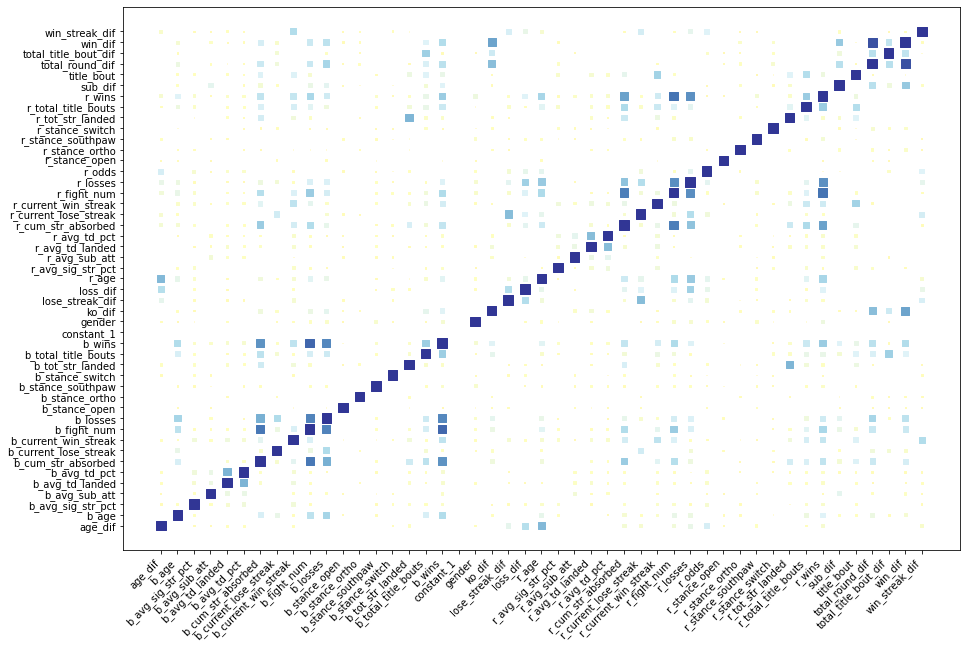

In [278]:
plt.figure(figsize=(25,17))

def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 90
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
        ,c=size, cmap='RdYlBu'
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
    plt.show()
    
corr = df_final.corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']

heatmap(x=corr['x'], y=corr['y'], size=corr['value'])

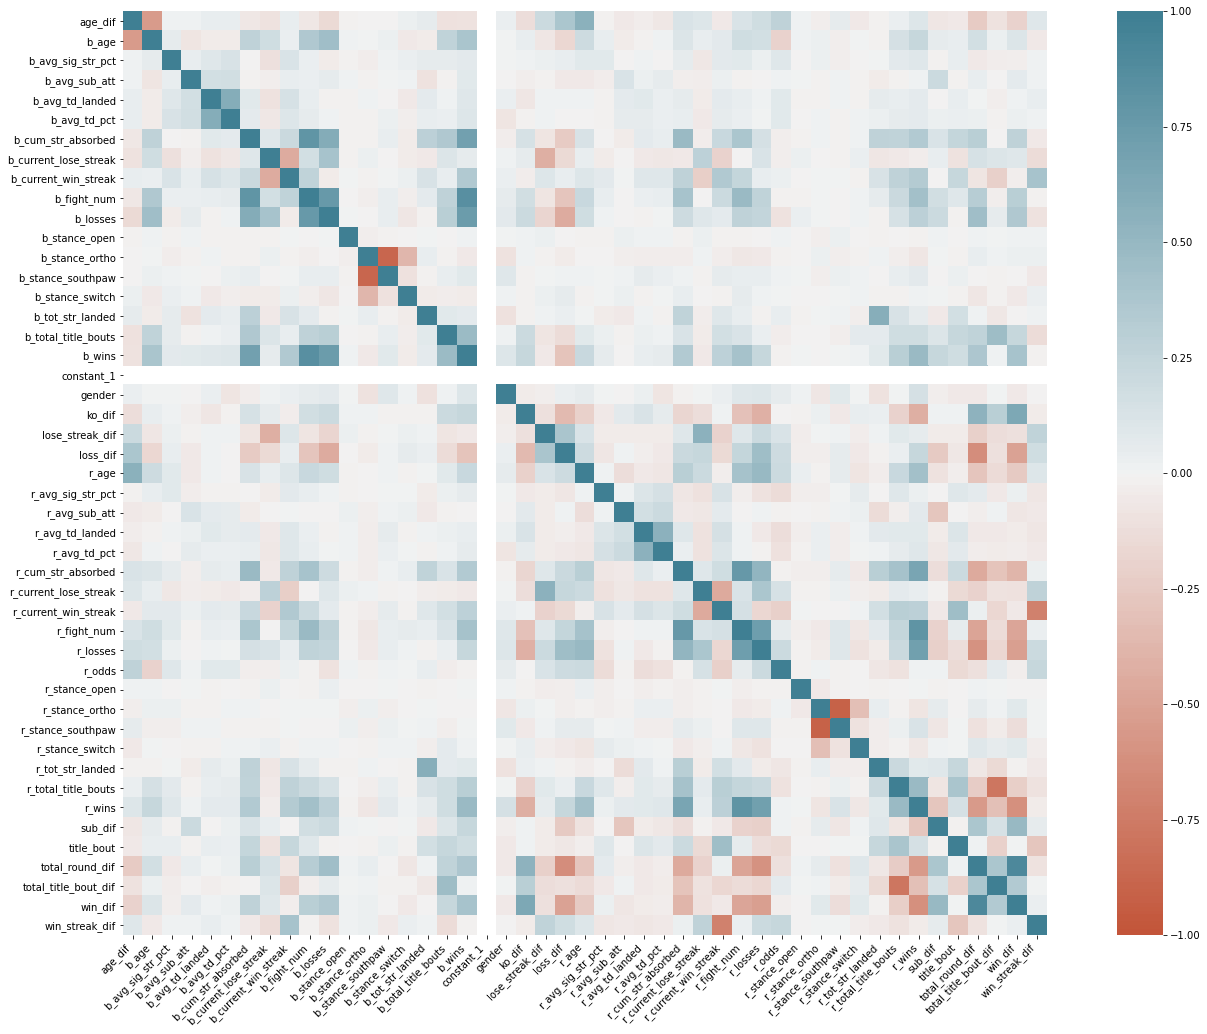

In [279]:
plt.figure(figsize=(25,17))

corr = df_final.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

In [107]:
# Remove features that have low variance (have same value for the majority/all the observations)

var_thres = VarianceThreshold(threshold=0).fit(df_final)

# To see remaining columns
cols_select = df_final.columns[var_thres.get_support()]

# To see dropped columns
for feature in df_final.columns.to_list():
    if feature not in cols_select:
        print(feature)

constant_1


In [280]:
df_final.shape

(4051, 56)

## Classification Algorithms

In [108]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report

In [194]:
names = ["Logistic Regression"
         ,"Logistic Regression CV"
         ,"Nearest Neighbors"
         ,"Linear SVM"
         ,"RBF SVM"
         #,"Gaussian Process"
         ,"Decision Tree"
         ,"Random Forest"
         ,"Neural Net"
         ,"AdaBoost"
         ,"Naive Bayes"
        ]

classifiers = [
    LogisticRegression(max_iter=200)
    ,LogisticRegressionCV(fit_intercept=True, cv=5, penalty='l2')
    ,KNeighborsClassifier(10)
    ,SVC(kernel="linear", C=0.025)
    ,SVC(gamma='scale', C=50)
    #,GaussianProcessClassifier(1.0 * RBF(1.0))
    ,DecisionTreeClassifier()
    ,RandomForestClassifier(n_estimators=100, oob_score=True)
    ,MLPClassifier(alpha=1, max_iter=750)
    ,AdaBoostClassifier()
    ,GaussianNB()
]

### a. Full set of features:

In [195]:
X = StandardScaler().fit_transform(df_final)

# 80-20 Train-Test Split

m_train = int(np.floor(X.shape[0]*0.8)) # 3,240 training data points
m_test = X.shape[0] - m_train # 811 test data points

X_train = X[m_test:]
y_train = np.array(y[m_test:])

X_test = X[0:m_test] # Most recent fights
y_test = np.array(y[0:m_test]) # Most recent fights

cv_error = {}
test_score = {}

k = 5

# Prepare K-Folds for Cross Validation:
kf = KFold(n_splits=k, random_state=111, shuffle=True)

X_cv_train = []
X_cv_test = []
y_cv_train = []
y_cv_test = []

for train_index, test_index in kf.split(X_train):
    X_cv_train.append(X_train[train_index])
    X_cv_test.append(X_train[test_index])
    y_cv_train.append(y_train[train_index])
    y_cv_test.append(y_train[test_index])

# iterate over classifiers
for name, clf in zip(names, classifiers):
    
    class_error = 0.
    
    #iterate over each fold
    for i in range(k):
        clf.fit(X_cv_train[i], y_cv_train[i])
        y_cv_test_pred = clf.predict(X_cv_test[i])
        class_error += np.sum(np.abs(y_cv_test_pred-y_cv_test[i]))
        
    cv_error[name] = 1 - (class_error/k)/(X_train.shape[0]/k)
    print('CV Accuracy of', name, ':', cv_error[name])
    
    clf.fit(X_train, y_train)
    
    print('\n*************** %s Evaluation on Training Data ***************' %name)
    print(classification_report(y_train, clf.predict(X_train)))
    
    print('*************** %s Evaluation on Test Data ***************' %name)
    print(classification_report(y_test, clf.predict(X_test)))

CV Accuracy of Logistic Regression : 0.6561728395061728

*************** Logistic Regression Evaluation on Training Data ***************
              precision    recall  f1-score   support

           0       0.63      0.50      0.56      1349
           1       0.69      0.79      0.74      1891

    accuracy                           0.67      3240
   macro avg       0.66      0.65      0.65      3240
weighted avg       0.66      0.67      0.66      3240

*************** Logistic Regression Evaluation on Test Data ***************
              precision    recall  f1-score   support

           0       0.56      0.45      0.50       339
           1       0.65      0.74      0.70       472

    accuracy                           0.62       811
   macro avg       0.61      0.60      0.60       811
weighted avg       0.61      0.62      0.61       811

CV Accuracy of Logistic Regression CV : 0.653395061728395

*************** Logistic Regression CV Evaluation on Training Data *******

In [196]:
clf = LogisticRegressionCV(fit_intercept=True, cv=5, penalty='elasticnet',
                           solver='saga', max_iter=1000, l1_ratios=[0.01])

class_error = 0.

#iterate over each fold
for i in range(k):
    clf.fit(X_cv_train[i], y_cv_train[i])

    y_cv_pred = clf.predict(X_cv_test[i])

    class_error += np.sum(np.abs(y_cv_pred-y_cv_test[i]))

print('CV Accuracy:', 1 - (class_error/k)/(X_train.shape[0]/5))

print('\n*************** Evaluation on Training Data ***************')
print(classification_report(y_train, clf.predict(X_train)))
    
print('*************** Evaluation on Test Data ***************')
print(classification_report(y_test, clf.predict(X_test)))

CV Accuracy: 0.6537037037037037

*************** Evaluation on Training Data ***************
              precision    recall  f1-score   support

           0       0.62      0.50      0.55      1349
           1       0.69      0.78      0.73      1891

    accuracy                           0.66      3240
   macro avg       0.65      0.64      0.64      3240
weighted avg       0.66      0.66      0.66      3240

*************** Evaluation on Test Data ***************
              precision    recall  f1-score   support

           0       0.57      0.46      0.51       339
           1       0.66      0.75      0.70       472

    accuracy                           0.63       811
   macro avg       0.61      0.60      0.60       811
weighted avg       0.62      0.63      0.62       811



In [211]:
weights = clf.coef_

# Top 'p' Features by Importance
p = 20
top_f = np.argsort(weights[0])[-p:][::-1]

print('Top %d Features by Weights are:\n' %p)

sub_features = []
for i, f in enumerate(top_f):
    sub_features.append(features[f])
    print(i+1, ':', features[f], 'weight:', weights[0][f])

Top 20 Features by Weights are:

1 : r_cum_str_absorbed weight: 0.31167854715079774
2 : b_odds weight: 0.30307202916840625
3 : r_weight_lbs weight: 0.20175667510166814
4 : r_avg_td_landed weight: 0.20062799917756283
5 : r_tot_str_absorbed weight: 0.16583663629923634
6 : avg_td_dif weight: 0.15208887773178542
7 : r_avg_sub_att weight: 0.12346177998684268
8 : avg_sub_att_dif weight: 0.12118453675555346
9 : b_tot_str_absorbed weight: 0.11161765156005157
10 : b_wins weight: 0.10984749403928414
11 : b_age weight: 0.09318752073832223
12 : longest_win_streak_dif weight: 0.09313776143568533
13 : r_tot_str_landed weight: 0.07802149397535862
14 : height_dif weight: 0.07439111052935553
15 : r_avg_sig_str_pct weight: 0.07239843658145528
16 : r_wins weight: 0.06608017314476043
17 : total_round_dif weight: 0.0655930984092936
18 : r_avg_td_pct weight: 0.048566973441848425
19 : r_stance_southpaw weight: 0.04676949794166191
20 : b_total_title_bouts weight: 0.04464366492902788


### b. Top Principal Components:

In [88]:
d = 21 # reduced dimension
pca = PCA(n_components=d)
Z = pca.fit_transform(X) # Reduced representation of input matrix

In [89]:
pca.explained_variance_

array([7.3448447 , 6.23299646, 5.7336374 , 3.31727986, 2.88813758,
       2.4410659 , 2.36612834, 2.08794921, 2.0091174 , 1.93221923,
       1.72893449, 1.51708377, 1.49166263, 1.44408349, 1.33508719,
       1.20961186, 1.09572058, 1.07758718, 1.02972339, 1.01161493,
       0.97507816])

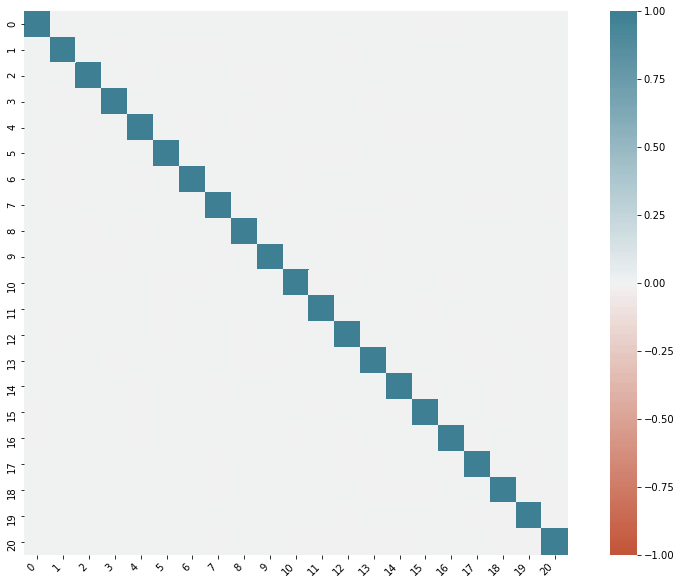

In [90]:
plt.figure(figsize=(15,10))

corr = pd.DataFrame(Z).corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

In [91]:
Z_train = Z[m_test:]
Z_test = Z[0:m_test]

Z_cv_train = []
Z_cv_test = []
Zy_cv_train = []
Zy_cv_test = []

for train_index, test_index in kf.split(Z_train):
    Z_cv_train.append(Z_train[train_index])
    Z_cv_test.append(Z_train[test_index])
    Zy_cv_train.append(y_train[train_index])
    Zy_cv_test.append(y_train[test_index])

cv_error = {}
test_score = {}

# iterate over classifiers
for name, clf in zip(names, classifiers):
    
    class_error = 0.
    
    #iterate over each fold
    for i in range(k):
        clf.fit(Z_cv_train[i], Zy_cv_train[i])
        Zy_cv_pred = clf.predict(Z_cv_test[i])
        class_error += np.sum(np.abs(Zy_cv_pred-Zy_cv_test[i]))
        
    cv_error[name] = 1 - (class_error/k)/(Z_train.shape[0]/k)
    print('CV Accuracy of', name, ':', cv_error[name])
    
    print('\n*************** %s Evaluation on Training Data ***************' %name)
    clf.fit(Z_train, y_train)
    print(classification_report(y_train, clf.predict(Z_train)))
    
    print('*************** %s Evaluation on Test Data ***************' %name)
    print(classification_report(y_test, clf.predict(Z_test)))

CV Accuracy of Logistic Regression : 0.6080246913580247

*************** Logistic Regression Evaluation on Training Data ***************
              precision    recall  f1-score   support

           0       0.57      0.32      0.41      1349
           1       0.63      0.83      0.72      1891

    accuracy                           0.62      3240
   macro avg       0.60      0.57      0.56      3240
weighted avg       0.61      0.62      0.59      3240

*************** Logistic Regression Evaluation on Test Data ***************
              precision    recall  f1-score   support

           0       0.53      0.24      0.33       339
           1       0.61      0.85      0.71       472

    accuracy                           0.59       811
   macro avg       0.57      0.54      0.52       811
weighted avg       0.57      0.59      0.55       811

CV Accuracy of Logistic Regression CV : 0.6037037037037036

*************** Logistic Regression CV Evaluation on Training Data ******

/Users/usmanmahmood/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV Accuracy of Decision Tree : 0.5962962962962963

*************** Decision Tree Evaluation on Training Data ***************
              precision    recall  f1-score   support

           0       0.62      0.40      0.48      1349
           1       0.66      0.82      0.73      1891

    accuracy                           0.65      3240
   macro avg       0.64      0.61      0.61      3240
weighted avg       0.64      0.65      0.63      3240

*************** Decision Tree Evaluation on Test Data ***************
              precision    recall  f1-score   support

           0       0.51      0.24      0.33       339
           1       0.60      0.83      0.70       472

    accuracy                           0.58       811
   macro avg       0.56      0.54      0.51       811
weighted avg       0.56      0.58      0.54       811

CV Accuracy of Random Forest : 0.6009259259259259

*************** Random Forest Evaluation on Training Data ***************
              precision   

### c. Handpick features:

In [110]:
X = StandardScaler().fit_transform(df_final)

# 80-20 Train-Test Split

m_train = int(np.floor(X.shape[0]*0.8)) # 3,240 training data points
m_test = X.shape[0] - m_train # 811 test data points

X_train = X[m_test:]
y_train = np.array(y[m_test:])

X_test = X[0:m_test] # Most recent fights
y_test = np.array(y[0:m_test]) # Most recent fights

cv_error = {}
test_score = {}

k = 5

# Prepare K-Folds for Cross Validation:
kf = KFold(n_splits=k, random_state=111, shuffle=True)

X_cv_train = []
X_cv_test = []
y_cv_train = []
y_cv_test = []

for train_index, test_index in kf.split(X_train):
    X_cv_train.append(X_train[train_index])
    X_cv_test.append(X_train[test_index])
    y_cv_train.append(y_train[train_index])
    y_cv_test.append(y_train[test_index])

# Identify Important features from Random Forest:
clf = RandomForestClassifier(n_estimators=100, oob_score=True)

class_error = 0.

#iterate over each fold
for i in range(k):
    clf.fit(X_cv_train[i], y_cv_train[i])
    y_cv_test_pred = clf.predict(X_cv_test[i])
    class_error += np.sum(np.abs(y_cv_test_pred-y_cv_test[i]))

cv_error = 1 - (class_error/k)/(X_train.shape[0]/k)
print('CV Accuracy:', cv_error)

clf.fit(X_train, y_train)

print('\n*************** Evaluation on Training Data ***************')
print(classification_report(y_train, clf.predict(X_train)))

print('*************** Evaluation on Test Data ***************')
print(classification_report(y_test, clf.predict(X_test)))

imp = clf.feature_importances_

# Top 'p' Features by Importance
p = 10
top_f = np.argsort(imp)[-p:][::-1]

print('Top %d Features by Importance are:\n' %p)

sub_features = []
for i, f in enumerate(top_f):
    sub_features.append(features[f])
    print(i+1, ':', features[f])

df_final_sub = df_final[sub_features].copy()

CV Accuracy: 0.6413580246913579

*************** Evaluation on Training Data ***************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1349
           1       1.00      1.00      1.00      1891

    accuracy                           1.00      3240
   macro avg       1.00      1.00      1.00      3240
weighted avg       1.00      1.00      1.00      3240

*************** Evaluation on Test Data ***************
              precision    recall  f1-score   support

           0       0.54      0.50      0.52       339
           1       0.66      0.69      0.67       472

    accuracy                           0.61       811
   macro avg       0.60      0.60      0.60       811
weighted avg       0.61      0.61      0.61       811

Top 10 Features by Importance are:

1 : b_odds
2 : r_odds
3 : r_avg_sig_str_pct
4 : b_avg_sig_str_pct
5 : r_cum_str_absorbed
6 : age_dif
7 : b_cum_str_absorbed
8 : b_tot_str_landed
9 : sig_str_dif


In [111]:
X = StandardScaler().fit_transform(df_final_sub)

# 80-20 Train-Test Split
m_train = int(np.floor(X.shape[0]*0.8)) # 3,240 training data points
m_test = X.shape[0] - m_train # 811 test data points

X_train = X[m_test:]
y_train = np.array(y[m_test:])

X_test = X[0:m_test] # Most recent fights
y_test = np.array(y[0:m_test]) # Most recent fights

cv_error = {}
test_score = {}

k = 5

# Prepare K-Folds for Cross Validation:
kf = KFold(n_splits=k, random_state=111, shuffle=True)

X_cv_train = []
X_cv_test = []
y_cv_train = []
y_cv_test = []

for train_index, test_index in kf.split(X_train):
    X_cv_train.append(X_train[train_index])
    X_cv_test.append(X_train[test_index])
    y_cv_train.append(y_train[train_index])
    y_cv_test.append(y_train[test_index])

# iterate over classifiers
for name, clf in zip(names, classifiers):
    
    class_error = 0.
    
    #iterate over each fold
    for i in range(k):
        clf.fit(X_cv_train[i], y_cv_train[i])
        y_cv_test_pred = clf.predict(X_cv_test[i])
        class_error += np.sum(np.abs(y_cv_test_pred-y_cv_test[i]))
        
    cv_error[name] = 1 - (class_error/k)/(X_train.shape[0]/k)
    print('CV Accuracy of', name, ':', cv_error[name])
    
    clf.fit(X_train, y_train)
    
    print('\n*************** %s Evaluation on Training Data ***************' %name)
    print(classification_report(y_train, clf.predict(X_train)))
    
    print('*************** %s Evaluation on Test Data ***************' %name)
    print(classification_report(y_test, clf.predict(X_test)))

CV Accuracy of Logistic Regression : 0.6506172839506172

*************** Logistic Regression Evaluation on Training Data ***************
              precision    recall  f1-score   support

           0       0.61      0.49      0.54      1349
           1       0.68      0.77      0.72      1891

    accuracy                           0.65      3240
   macro avg       0.64      0.63      0.63      3240
weighted avg       0.65      0.65      0.65      3240

*************** Logistic Regression Evaluation on Test Data ***************
              precision    recall  f1-score   support

           0       0.56      0.42      0.48       339
           1       0.65      0.76      0.70       472

    accuracy                           0.62       811
   macro avg       0.60      0.59      0.59       811
weighted avg       0.61      0.62      0.61       811

CV Accuracy of Logistic Regression CV : 0.653395061728395

*************** Logistic Regression CV Evaluation on Training Data *******

In [72]:
X.shape

(4051, 3)

## Hypothesis Testing

### Does damage absorbed in previous fights influence fight outcomes?

In [189]:
red = df_new[['r_fighter', 'date', 'r_avg_str_absorbed', 'r_cum_str_absorbed','winner']].copy()
red.loc[red['winner'].isin({1}), 'winner'] = 'won'
red.loc[red['winner'].isin({0}), 'winner'] = 'lost'
red.rename(columns={'r_fighter': 'fighter',
                     'r_avg_str_absorbed': 'avg_str_absorbed',
                     'r_cum_str_absorbed': 'cum_str_absorbed'
                    }, inplace=True)

blue = df_new[['b_fighter', 'date', 'b_avg_str_absorbed', 'b_cum_str_absorbed','winner']].copy()
blue.loc[blue['winner'].isin({0}), 'winner'] = 'won'
blue.loc[blue['winner'].isin({1}), 'winner'] = 'lost'
blue.rename(columns={'b_fighter': 'fighter',
                     'b_avg_str_absorbed': 'avg_str_absorbed',
                     'b_cum_str_absorbed': 'cum_str_absorbed'
                    }, inplace=True)

# Combine data for Blue and Red fighters
red_blue = pd.concat([red, blue])
red_blue = red_blue.sort_values(by=['cum_str_absorbed'], ascending=True)
red_blue.reset_index(drop=True, inplace=True)

red_blue = red_blue.dropna(axis=0) #drop rows containing nulls
red_blue.reset_index(drop=True, inplace=True)

# Fighters who Won
won = red_blue[(red_blue['winner'] == 'won') & (red_blue['cum_str_absorbed'] != 0)]['cum_str_absorbed']

# Fighters who Lost
lost = red_blue[(red_blue['winner'] == 'lost') & (red_blue['cum_str_absorbed'] != 0)]['cum_str_absorbed']

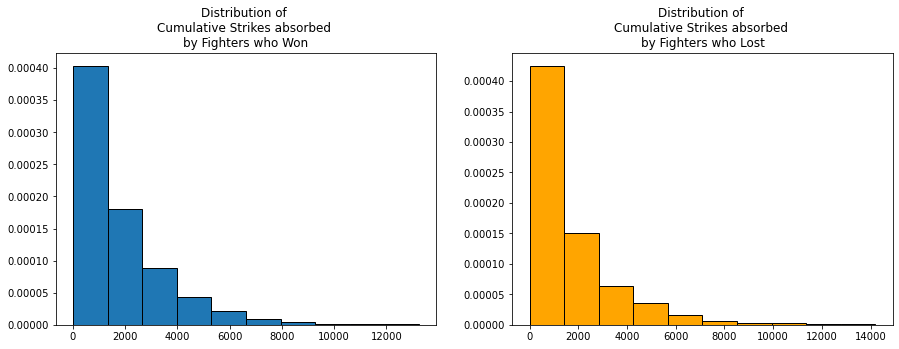

In [190]:
f, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(won, density=True, edgecolor='black')
axs[0].set_title('Distribution of \nCumulative Strikes absorbed \nby Fighters who Won')
axs[1].hist(lost, color='Orange', density=True, edgecolor='black')
axs[1].set_title('Distribution of \nCumulative Strikes absorbed \nby Fighters who Lost')
plt.show()

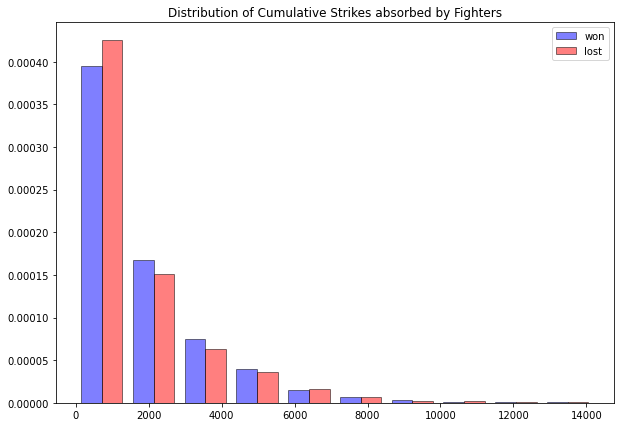

In [191]:
plt.figure(figsize=(10,7))
plt.hist([won, lost], color=['b','r'], alpha=0.5, bins=10, density=True, edgecolor='black', label=['won', 'lost'])
plt.legend(loc='upper right')
plt.title('Distribution of Cumulative Strikes absorbed by Fighters')
plt.show()